In [1]:
# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cell_df = pd.read_csv('short.csv')

In [3]:
print("shape : \n",cell_df.shape)
print("\n 1st 5 rows :\n",cell_df.head())
print("\n last 5 rows : \n",cell_df.tail())
print("\n each cell count \n",cell_df.count())
print(cell_df['class'].value_counts())
print(cell_df.dtypes)

shape : 
 (499, 7)

 1st 5 rows :
                                      original  \
0         person horse jump broken airplane .   
1         person horse jump broken airplane .   
2              Children smiling waving camera   
3              Children smiling waving camera   
4  boy jumping skateboard middle red bridge .   

                           suspicious  class  word_similarity  \
0  person diner , ordering omelette .      0         0.125000   
1           person outdoors , horse .      1         0.333333   
2                       child present      1         0.200000   
3                        kid frowning      0         0.200000   
4                boy skate sidewalk .      0         0.125000   

   bigram_similarity  lsa_similarity  fingerprint_similarity  
0           0.778283           0.127                0.204545  
1           0.778283           0.356                0.297297  
2           0.000000           0.000                0.133333  
3           0.000000       

<AxesSubplot:xlabel='lsa_similarity', ylabel='fingerprint_similarity'>

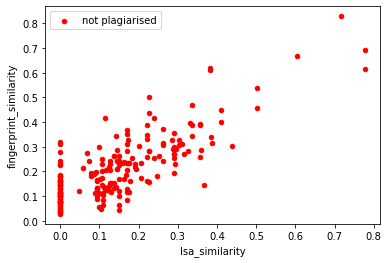

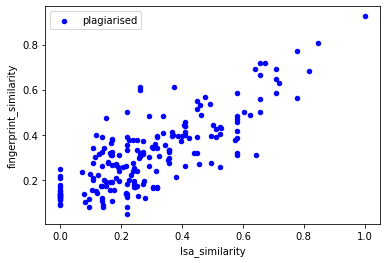

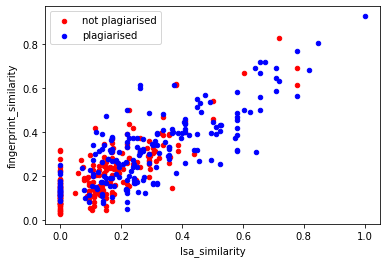

In [4]:
no_df = cell_df[cell_df['class']==0][0:200]
yes_df = cell_df[cell_df['class']==1][0:200]

#help(age_df.plot)

no_df.plot(kind='scatter', x='lsa_similarity', y='fingerprint_similarity', color='red', label='not plagiarised')
yes_df.plot(kind='scatter', x='lsa_similarity', y='fingerprint_similarity', color='blue', label='plagiarised')


axe1 = no_df.plot(kind='scatter', x='lsa_similarity', y='fingerprint_similarity', color='red', label='not plagiarised')

yes_df.plot(kind='scatter', x='lsa_similarity', y='fingerprint_similarity', color='blue', label='plagiarised', ax=axe1)



 converting the non-numerical to numerical column

In [22]:
cell_df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
cell_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


remove unwanted column

In [5]:
print("total cells before :\n",cell_df.columns)
feature_df = cell_df[[ 'lsa_similarity' , 'fingerprint_similarity']]  #'Gender',
print("\ntotal cells after :\n",feature_df.columns)

total cells before :
 Index(['original', 'suspicious', 'class', 'word_similarity',
       'bigram_similarity', 'lsa_similarity', 'fingerprint_similarity'],
      dtype='object')

total cells after :
 Index(['lsa_similarity', 'fingerprint_similarity'], dtype='object')


In [6]:
#independent variables
x= np.asarray(feature_df)

#dependent variables 
y= np.asarray(cell_df['class'])

#print 
print("x : \n",x[0:5])
print("y : \n",y[0:5])

x : 
 [[0.127      0.20454545]
 [0.356      0.2972973 ]
 [0.         0.13333333]
 [0.         0.06451613]
 [0.136      0.26315789]]
y : 
 [0 1 1 0 0]


# dividing the data into train/test data

In [7]:
'''
cell_df(10 rows) --> train(8 rows) + test(2 rows)
train(x,y) --> x is 2d array and y is 1d array
test(x,y)
'''

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.9,random_state=4)


print("x_train rows and cols :",x_train.shape)
print("x_test rows and cols :",x_test.shape)
print("y_train rows and cols :",y_train.shape)
print("y_test rows and cols :",y_test.shape)

x_train rows and cols : (49, 2)
x_test rows and cols : (450, 2)
y_train rows and cols : (49,)
y_test rows and cols : (450,)


In [8]:
print(x_train[0:5])

[[0.252      0.23913044]
 [0.777      0.61538461]
 [0.         0.21212121]
 [0.         0.12      ]
 [0.         0.09090909]]


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [10]:
print(x_train[0:5])

[[-0.02286568 -0.33743753]
 [ 2.65085933  2.02780466]
 [-1.30625368 -0.50722529]
 [-1.30625368 -1.08632578]
 [-1.30625368 -1.26919961]]


# Creating SVM Model from sklearn

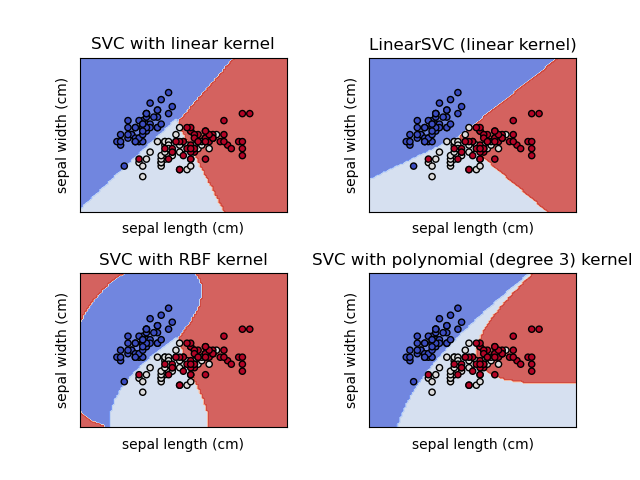

In [65]:
from sklearn import svm

#SVC = support vector classifer

classifier = svm.SVC(kernel='linear', gamma = 'auto', C = 0.4)
#c is the penalty imposed on the incorrectly places datapoints


# training the data 

In [66]:
classifier.fit(x_train,y_train)

SVC(C=0.4, gamma='auto', kernel='linear')

# testing the data

In [67]:
y_pred = classifier.predict(x_test)

# result

In [68]:
from sklearn import metrics
print("accuracy score with linear kernel :")
print(metrics.accuracy_score(y_test,y_pred))

accuracy score with linear kernel :
0.6333333333333333


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71       222
           1       0.80      0.37      0.50       228

    accuracy                           0.63       450
   macro avg       0.69      0.64      0.61       450
weighted avg       0.69      0.63      0.61       450



In [54]:
classifier.support_vectors_

array([[ 2.65085933,  2.02780466],
       [-0.49140415, -0.35483043],
       [ 0.0688049 , -0.61075441],
       [-0.70020934, -1.05489434],
       [-0.18583558, -0.22420626],
       [ 0.63410675,  2.01220593],
       [-0.43538325, -0.36155373],
       [ 0.47113685,  0.49840361],
       [-0.57288911, -0.51725127],
       [-0.65946687, -0.55484868],
       [-0.09416501,  0.77860638],
       [ 0.1757539 ,  0.40442256],
       [ 0.02296961,  0.09356216],
       [-0.18583558,  0.33534247],
       [ 0.02296961,  0.14446327],
       [-0.43538325, -0.07266181],
       [-0.18583558,  0.61250526],
       [-0.43538325, -0.76303096],
       [-0.02286568, -0.33743753],
       [-0.66965249, -0.46076344],
       [ 0.85309756,  0.58811279],
       [ 0.84291195,  0.64074918],
       [ 1.02625309,  1.51200666],
       [ 1.01097466, -0.15411524],
       [-0.34880549, -0.22148492],
       [-0.31824863, -0.3319712 ],
       [ 0.23686761, -0.79296566],
       [ 2.12629995,  2.67255217],
       [-0.15527872,